In [73]:
import os
import pickle
import numpy as np
import pandas as pd
import numpy.linalg as npla
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LogisticRegression
from sklearn.metrics import accuracy_score, log_loss
%matplotlib inline
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.svm import SVR
from sklearn.datasets import load_boston
from collections import deque

In [74]:
data=pd.read_csv('../data/OnlineNewsPopularity.csv')
data.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [75]:
y = data[" shares"]
X = data.drop(["url", " shares"],axis=1)
X.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,...,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,...,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,...,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,...,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,...,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364


In [76]:
Xtrain,Xvalidate,ytrain,yvalidate = train_test_split(X, y, test_size = 0.9)

n = Xtrain.shape[0]
d = Xtrain.shape[1]
t = Xvalidate.shape[0]

print("Number of training examples:", n)
print("Number of features:", d)

Number of training examples: 3964
Number of features: 59


In [77]:
def fit_and_report(model, X, y, Xv, yv):
    model.fit(X,y)
    scores = [model.score(X, y), model.score(Xv, yv)]
    
    return scores
    
score = fit_and_report(Ridge(), Xtrain, ytrain, Xvalidate, yvalidate)

print("Training score:   %.3g" % score[0])
print("Validation score: %.3g" % score[1])

Training score:   0.0421
Validation score: -0.344


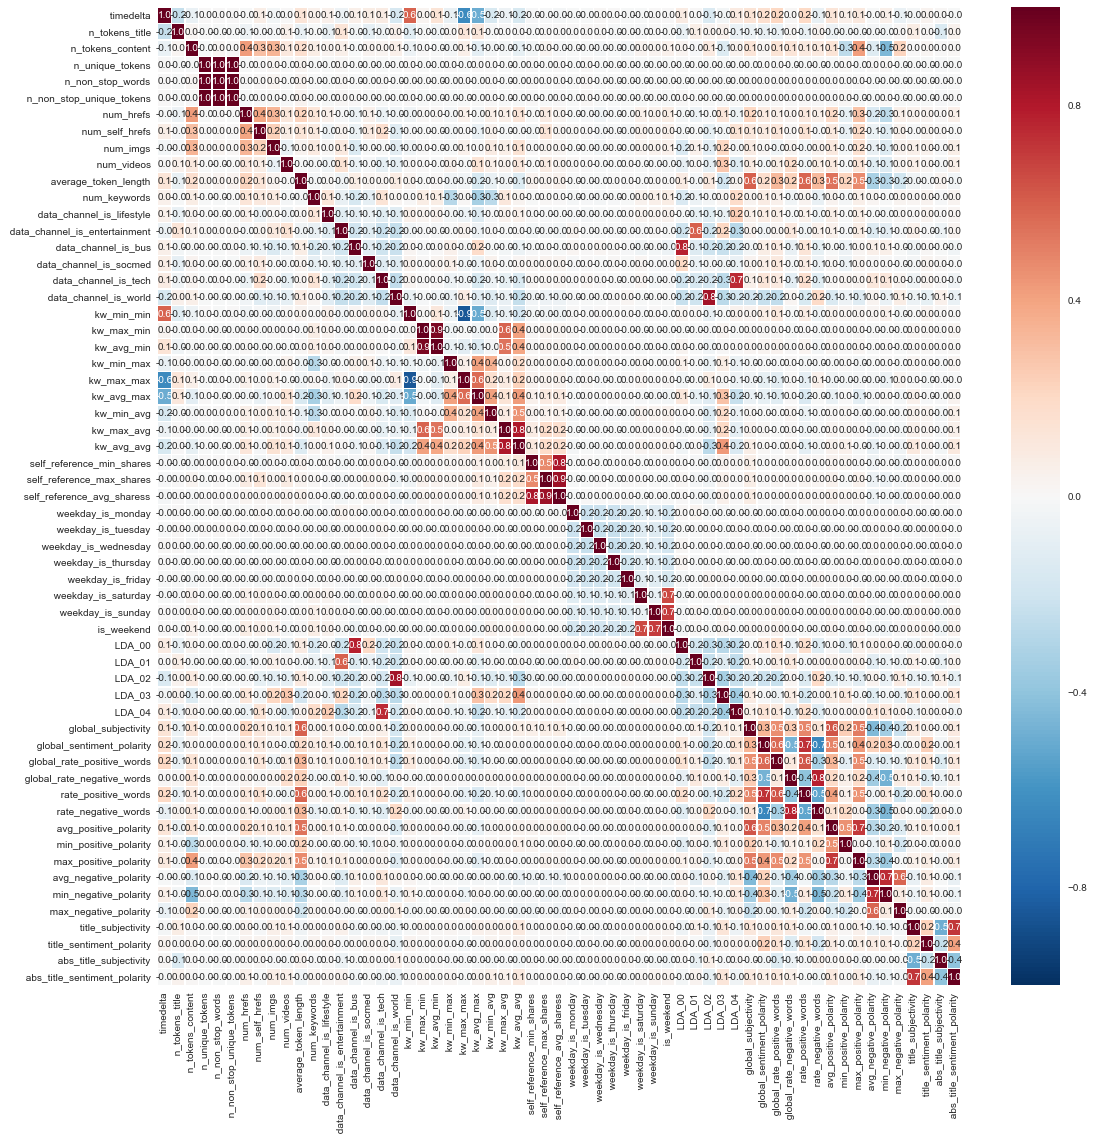

In [81]:
import seaborn as sns
f,ax = plt.subplots(figsize=(18,18))
sns.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [82]:
class ForwardSelection:
    def __init__(self, model, min_features=None, max_features=None, 
                 scoring=None, cv=None):
        self.max_features = max_features
        if min_features is None:
            self.min_features = 1
        else:
            self.min_features = min_features
    
        self.model = model
        self.scoring = scoring
        self.cv = cv
        return
    
    def fit(self, X, y):
        if (self.max_features is None) or (self.max_features > X.shape[1]):
            self.max_features = X.shape[1]
        
        self.ftr_ = []
        idx = np.setdiff1d(range(X.shape[1]), self.ftr_)
    
        best_round_score = deque()
        best_round_score.append(np.inf)

        X_train, X_val, y_train, y_val = train_test_split(X, y)
        
        for j in range(self.max_features):
            round_scores = np.zeros(idx.size)
            for i, ii in enumerate(idx):
                X_train_s = X_train.iloc[:, self.ftr_ + [ii]]
                X_val_s = X_val.iloc[:, self.ftr_ + [ii]]
                round_scores[i] = fit_and_report(self.model, X_train_s, y_train, 
                                                 X_val_s, y_val)[1] # val error only

            i_star = np.argmin(round_scores)
            ii_star = idx[i_star]
            best_round_score.append(round_scores[i_star])

            if (len(self.ftr_) > self.min_features) and (best_round_score[-1] >= best_round_score[-2]):
                print('found best subset.')
                self.best_round_scores_ = np.array(best_round_score)[1:-1]
                self.score_ = best_round_score[-2]
                return
            elif (len(self.ftr_) >= self.max_features):
                print('reached max features.')
                self.best_round_scores_ = np.array(best_round_score)[1:-1]
                self.score_ = best_round_score[-2]
                return
            else:
                self.ftr_ += [ii_star]
                idx = np.setdiff1d(range(X.shape[1]), self.ftr_)
        return
    
    def transform(self, X, y=None):
        return X.iloc[:, self.ftr_]

In [83]:
fs = ForwardSelection(Ridge())
fs.fit(Xtrain,ytrain)

found best subset.


In [84]:
print('features: {}'.format(fs.ftr_))
print('final mean xval error: {}'.format(fs.score_))

features: [8, 31, 1, 9, 7, 14, 16, 39, 17, 19, 50, 45, 0, 2, 15, 42, 12, 10, 4, 33, 53, 47, 46, 48, 18, 56, 51]
final mean xval error: -0.07203325084218193


In [85]:
Xtrain2 = Xtrain[Xtrain.columns[fs.ftr_]]
Xvalidate2 = Xvalidate[Xvalidate.columns[fs.ftr_]]

In [86]:
fit_and_report(Ridge(), Xtrain2, ytrain, Xvalidate2, yvalidate)

[0.017545582493438405, -0.93501522952565519]

num_features: 27


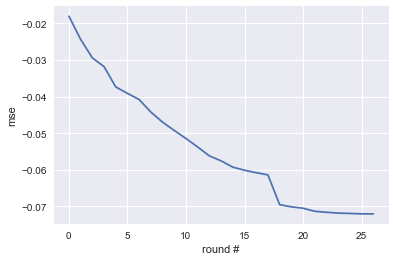

In [87]:
print('num_features: {}'.format(len(fs.ftr_)))
plt.plot(fs.best_round_scores_)
plt.ylabel('mse')
plt.xlabel('round #')

In [88]:
mean_squared_err = lambda y, yhat: np.mean((y-yhat)**2)

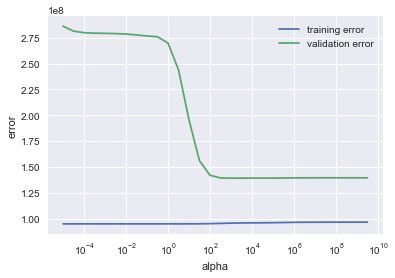

min error is : 139086913.80352682
when alpha is: 1000.0


In [89]:
alpha = 10**np.arange(-5,10,0.5)

def err_plot(model,alpha, X = Xtrain2,y=ytrain,Xvalidate=Xvalidate2, yvalidate=yvalidate):
    training_err = []
    validation_err = []
    for i in alpha:
        l = model(alpha = i)
        l.fit(X,y)
        training_err.append(mean_squared_err(y, l.predict(X)))
        validation_err.append(mean_squared_err(yvalidate,l.predict(Xvalidate)))
        
    plt.plot(alpha,training_err, label= "training error")
    plt.plot(alpha,validation_err, label="validation error")
    plt.xlabel("alpha")
    plt.ylabel("error")
    plt.xscale("log")
    plt.legend(loc="upper right")
    plt.show()
    
    print("min error is :",min(validation_err))
    print("when alpha is:", alpha[validation_err.index(min(validation_err))])
err_plot(Ridge,alpha)

/Users/Fang/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


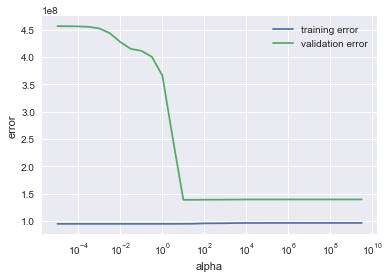

min error is : 138820389.80300367
when alpha is: 31.6227766017


In [90]:
err_plot(Lasso,alpha)

/Users/Fang/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


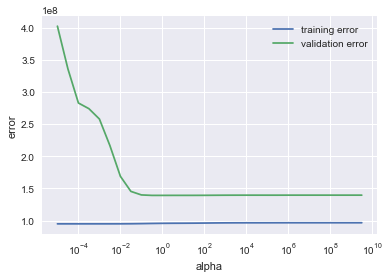

min error is : 139104104.78945327
when alpha is: 0.316227766017


In [91]:
err_plot(ElasticNet,alpha)

In [92]:
score = fit_and_report(Ridge(), Xtrain, ytrain, Xvalidate, yvalidate)

print("Training score:   %.3g" % score[0])
print("Validation score: %.3g" % score[1])

Training score:   0.0421
Validation score: -0.344


In [94]:
score = fit_and_report(ElasticNet(alpha = 0.316), Xtrain2, ytrain, Xvalidate2, yvalidate)

print("Training score:   %.3g" % score[0])
print("Validation score: %.3g" % score[1])

Training score:   0.0114
Validation score: 0.00263
